In [1]:
import GPy
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_pickle('Random_GMRQ-2_GMRQ-CSE-clean.pickl')


In [3]:
df.head(2)

,id,feature,parameters,test_scores,train_scores,cse_test_scores,cse_train_gaps,cse_train_n_timescales,cse_train_scores,test_scores_mean,cse_test_scores_mean,cse_train_gaps_mean
947,2,alpha_angle,"{'msm__n_timescales': 2, 'tica__commute_mappin...","[2.7929254738960707, 2.806366141062694, 2.6499...","[2.8238005249605154, 2.870721463825274, 2.9884...","[1.96372272307, 1.99871800747, 1.98917327543, ...","[3.97634298203, 16.9731128258, 42.2860267941, ...","[1, 1, 1, 1, 2]","[1.99048647384, 1.99925393958, 1.99986176834, ...",2.613855,2.185815,16.218150
76,4,alpha_angle,"{'msm__n_timescales': 2, 'tica__commute_mappin...","[2.948540113694251, 2.632606230422432, 2.87014...","[2.993834214901289, 2.978360161399329, 2.99909...","[5.40378045921, 3.88709659215, 1.95245287852, ...","[2.89773741805, 6.58039903006, 17.0715041883, ...","[5, 3, 1, 2, 1]","[5.86174757165, 3.9922788621, 1.99992166853, 2...",2.878763,3.207427,55.256862


In [4]:
# extract params
params = ['tica__lag_time', 'tica__n_components', 'cluster__n_clusters']
for param in params:
    df[param.split('__')[-1]] = df['parameters'].apply(lambda x: x[param])

In [5]:
# calculate error
df['test_error'] = df['test_scores'].apply(lambda x: np.array(x).std())

In [6]:
feature='kappa_angle'

In [31]:
# Get obvservations
y = df.loc[df['feature']==feature, 'test_scores_mean'].values

In [32]:
# Get inputs:
X = df.loc[df['feature']==feature, ['lag_time','n_components', 'n_clusters']].values

In [33]:
var_min, var_max = 10, 500
Z = [int(np.exp(np.random.uniform(np.log(var_min), np.log(var_max+1)))) for _ in range(199)]

In [34]:
# Get noise
err = df.loc[df['feature']==feature, 'test_error'].values

In [35]:
y = y[:, None]
# X = X[:, None]
err = err[:, None]
print(y.shape, X.shape, err.shape)


(199, 1) (199, 3) (199, 1)


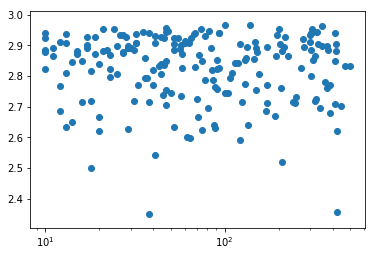

In [36]:
X.T[0] = Z
plt.scatter(X.T[0], y)
plt.xscale('log')

In [73]:
kernel = GPy.kern.Matern52(input_dim=1) + GPy.kern.White(input_dim=1)


array([10,  7, 10,  9,  9,  1,  9,  2,  7,  7,  6,  7,  8,  6,  5,  4, 10,
       10,  1,  6,  8,  4,  4,  9,  3,  1, 10,  8,  7,  7,  6,  6,  4,  6,
        7,  3,  3, 10,  1, 10,  4, 10,  6,  3,  2,  9, 10,  3,  8,  3,  7,
        8,  2,  6,  2,  3,  5,  2,  6, 10,  3,  5,  6,  1,  5,  7,  2,  9,
       10, 10,  8,  4,  5,  9, 10,  5,  5,  4,  9,  4,  7,  7,  8,  8,  3,
        9,  1,  6,  8,  2,  5,  1,  9,  7,  4,  9,  9,  1,  9,  2,  5,  5,
        1, 10,  2, 10,  5,  5,  7,  9,  2,  1,  6,  7,  4,  3,  7,  2,  6,
        3,  7,  7,  1,  4,  1,  4, 10,  2,  2,  5,  4,  6,  6,  6, 10,  9,
       10, 10,  2,  6,  6,  4,  4,  8,  6,  5,  6,  2,  6,  3,  4,  1,  2,
        8,  8,  4,  5,  8,  6,  5,  5,  6, 10,  7,  5,  6, 10,  1,  4, 10,
        3,  8,  6,  1,  6,  6,  8,  3, 10,  2,  9,  7,  2,  9,  3, 10,  2,
        6,  1,  7,  9,  3,  6,  3,  3,  1,  2,  7,  9])

In [80]:
m = GPy.models.GPRegression(X[:,2][:, None],y,kernel)
m.optimize_restarts(num_restarts = 20, verbose=False)

 /Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/paramz-0.7.4-py3.5.egg/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1
 /Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/GPy/kern/src/stationary.py:160: RuntimeWarning:overflow encountered in true_divide
 /Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/GPy/kern/src/stationary.py:482: RuntimeWarning:overflow encountered in multiply
 /Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/GPy/kern/src/stationary.py:482: RuntimeWarning:overflow encountered in square
 /Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/GPy/kern/src/stationary.py:482: RuntimeWarning:invalid value encountered in multiply
 /Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/paramz-0.7.4-py3.5.egg/paramz/transformations.py:106: RuntimeWarning:invalid value encountered in greater
 /Users/robert_arbon/anaconda/envs/ml4dyn/lib/pyt

 /Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/matplotlib/figure.py:1743: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


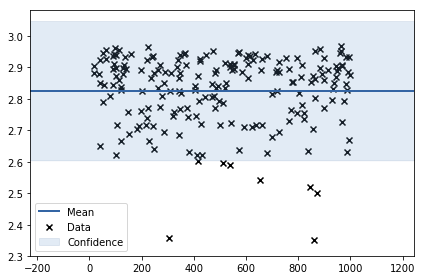

In [81]:
m.plot()